1. Installation des Bibliothèques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from transformers import BertModel
from tqdm import tqdm
#from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

2. Chargement des données

In [3]:
ben = pd.read_csv('data/Train.csv')
ben.head(10)

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence
5,ID_0052TYKI,"Yes men rape women. But women also rape men, y...",sexual_violence
6,ID_0058QG76,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence
7,ID_005VM1DJ,Pretty sure he raped a 16yr old girl with 2 fr...,sexual_violence
8,ID_0060BW8R,TW sorry to hear that and yeah he recently th...,sexual_violence
9,ID_007FAIEI,"""I understand that... My father was abusive as...",sexual_violence


In [4]:
ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39650 entries, 0 to 39649
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_ID  39650 non-null  object
 1   tweet     39650 non-null  object
 2   type      39650 non-null  object
dtypes: object(3)
memory usage: 929.4+ KB


In [13]:
print(f"Afficher la taille de notre dataset : {ben.shape[0]}")
print()
print(f"Nombre des variables dans notre dataset : {ben.shape[1]}")
print()
print(f"Liste des variables dans le dataset:{ben.columns}")

Afficher la taille de notre dataset : 39650

Nombre des variables dans notre dataset : 3

Liste des variables dans le dataset:Index(['Tweet_ID', 'tweet', 'type'], dtype='object')


3. Vérification des données manquante

In [14]:
ben.isnull().sum()

,0
Tweet_ID,0
tweet,0
type,0


4. Présentation de la variable de sortie

In [6]:
ben.type.unique()

array(['sexual_violence', 'Physical_violence', 'emotional_violence',
       'Harmful_Traditional_practice', 'economic_violence'], dtype=object)

4.1. Description de la variable

In [15]:
type_freq = ben['type'].value_counts()
type_cat = ben['type'].unique()
percent_type = (ben['type'].value_counts()/ben.shape[0])*100

In [18]:
print(f"Présentation des effectifs de la variable type de tweets : {type_freq}")

Présentation des effectifs de la variable types de tweets : type
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: count, dtype: int64


In [19]:
print(f"Présentation des pourcentages de la variable type de tweets : {percent_type}")

Présentation des pourcentages de la variable type de tweets : type
sexual_violence                 82.340479
Physical_violence               14.996217
emotional_violence               1.641866
economic_violence                0.547289
Harmful_Traditional_practice     0.474149
Name: count, dtype: float64


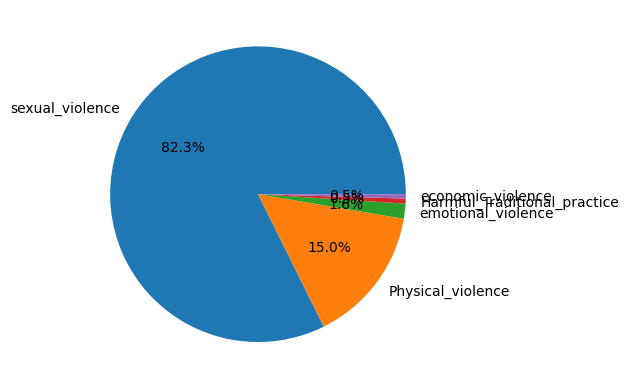

In [20]:
plt.pie(type_freq, labels=type_cat, autopct='%1.1f%%')
plt.show()

N.B: nous avons connu, un problème avec les ressources et la memoire de la machine, pour ce nous avions utilisé un echantillon de n = 1000 ce choix a été motivé dans plusieur papiers et nous avions mis des liens dans le README.md

4.2 Echantillonnage

In [21]:
ben = ben.sample(n=1000, random_state=42)
ben.head()
ben.shape

(1000, 3)

In [22]:
type_freq = ben['type'].value_counts()
type_cat = ben['type'].unique()
percent_type = (ben['type'].value_counts()/ben.shape[0])*100

In [23]:
print(f"Présentation des pourcentages de la variable type de tweets : {percent_type}")

Présentation des pourcentages de la variable type de tweets : type
sexual_violence                 82.0
Physical_violence               15.8
emotional_violence               1.6
economic_violence                0.4
Harmful_Traditional_practice     0.2
Name: count, dtype: float64


N.B : En comparant, la population de 39650 et l'echantillon de 1000, la modalité sexual_violence est reste aux alentours de 82%. d'où, nous pensons travailler avec cet echantillon et nous allons faire l'inférence après.

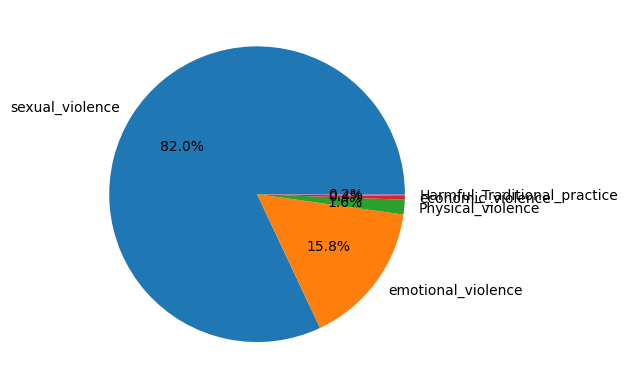

In [24]:
plt.pie(type_freq, labels=type_cat, autopct='%1.1f%%')
plt.show()

5. Transformation de type en encoder

l'Achitecture de transformer suivant a été appliquer pour notre transformation.

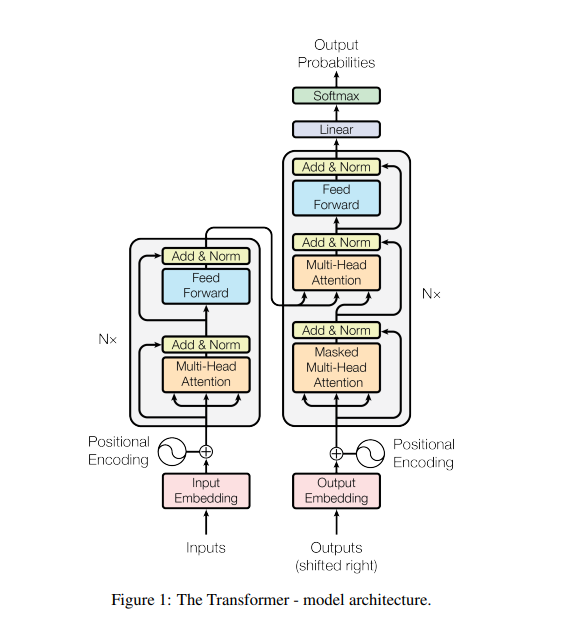

5.1. Change the labeling to numerical values

In [25]:
label_encoder = LabelEncoder()
ben['type'] = label_encoder.fit_transform(ben['type'])

5.2. Train-test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(ben['tweet'], ben['type'], test_size=0.2, random_state=42)

5.3. Ensure y_train and y_test are numpy arrays before converting to tensors as the .tensor fucntion expects lists, numpys or other tensors

In [27]:
y_train = np.array(y_train)
y_test = np.array(y_test)

5.4. Convert labels to tensors of type Long as many of loss fucntions such as CrossEntropyLoss require tensor of long type

In [28]:
y_train = torch.tensor(y_train).long()
y_test = torch.tensor(y_test).long()

5.5. Load BERT tokenizer and model

In [29]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(ben['type'].unique()))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


5.6.  Tokenize input texts

In [30]:
def tokenize(batch):
  return tokenizer(batch, padding=True, truncation=True, max_length=512, return_tensors='pt')

#Converting to list it is suitable to be tokenzied
train_encodings = tokenize(X_train.tolist())
test_encodings = tokenize(X_test.tolist())

6. Create PyTorch datasets for handling input encodings and labels.

6.1. Dataset

In [31]:
class customDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

In [32]:
train_dataset = customDataset(train_encodings, y_train)
test_dataset = customDataset(test_encodings, y_test)

6.2. DataLoader

DataLoader
shuffle is set to True, so that data is shuffled before each epoch for a more generalized model.

In [33]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

6.3. Define optimizer

In [34]:
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

6.4. Entrainement du modele

In [39]:
model.train()
epochs = 3
losses = []
for epoch in range(epochs):
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        inputs = {key: val.to(model.device) for key, val in batch.items()}
        outputs = model(**inputs)
        # outputs.loss is CrossEntropyLoss inside BERT

        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        avg_epoch_loss = total_loss / len(train_loader)
        losses.append(avg_epoch_loss)
        #losses.append(loss.item())
        print(f'Epoch {epoch + 1}/{epochs}, average Loss: {avg_epoch_loss:.10f} ')

Epoch 1/3, average Loss: 0.0000149196 
Epoch 1/3, average Loss: 0.0000356676 
Epoch 1/3, average Loss: 0.0001989663 
Epoch 1/3, average Loss: 0.0002201482 
Epoch 1/3, average Loss: 0.0002386843 
Epoch 1/3, average Loss: 0.0002686198 
Epoch 1/3, average Loss: 0.0002853881 
Epoch 1/3, average Loss: 0.0003068911 
Epoch 1/3, average Loss: 0.0003357894 
Epoch 1/3, average Loss: 0.0005954716 
Epoch 1/3, average Loss: 0.0006184758 
Epoch 1/3, average Loss: 0.0006413724 
Epoch 1/3, average Loss: 0.0006540000 
Epoch 1/3, average Loss: 0.0006734162 
Epoch 1/3, average Loss: 0.0006918956 
Epoch 1/3, average Loss: 0.0007093433 
Epoch 1/3, average Loss: 0.0007334971 
Epoch 1/3, average Loss: 0.0007481697 
Epoch 1/3, average Loss: 0.0009582267 
Epoch 1/3, average Loss: 0.0011846425 
Epoch 1/3, average Loss: 0.0013901610 
Epoch 1/3, average Loss: 0.0014075293 
Epoch 1/3, average Loss: 0.0014223926 
Epoch 1/3, average Loss: 0.0014367701 
Epoch 1/3, average Loss: 0.0014561836 
Epoch 1/3, average Loss: 

In [45]:
#Finding out metrics such as accuracy, recall, precision and f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

6.5. Evaluation du modèle

In [46]:
model.eval()

y_preds = []
y_true = []

with torch.no_grad():
    for batch in test_loader:
        inputs = {key: val.to(model.device) for key, val in batch.items()}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        y_preds.extend(preds.cpu().numpy())
        y_true.extend(batch['labels'].cpu().numpy())

y_preds = np.array(y_preds)
y_true = np.array(y_true)

num_classes = len(label_encoder.classes_)

accuracy = accuracy_score(y_true, y_preds)
precision = precision_score(y_true, y_preds, average='macro', labels=np.arange(num_classes))
recall = recall_score(y_true, y_preds, average='macro', labels=np.arange(num_classes))
f1 = f1_score(y_true, y_preds, average='macro', labels=np.arange(num_classes))

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9950
Precision: 0.5600
Recall: 0.5988
F1 Score: 0.5772


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

7. Test du modele

Nous avons utilisé 5 tweets pour vérifier la performance de ce modèle, un choix était porté aléatoirement dans chaque type selon le tweet cela veut dire : "sexual_violence","physical_violence", "Harmful_Traditional_practice", "emotional_violence" et "economic_violence" parmi ces modalités nous avions selectionné les tweets pour chaque modalités.

7.1. Premier tweet

In [49]:
text = "My paedophile stepbrother raped me while I was about 5 years old. He threatened to kill me if I told anyone. . Part 1."
inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt').to(model.device)
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1)
label = label_encoder.inverse_transform(preds.cpu().numpy())[0]
print(label)

sexual_violence


7.2. Deuxième tweet

In [50]:
text = "My husband does NOT beat me...  The wife of Githunguri MP  has denied allegations that her husband beats her.Last week bloggers shared images of her with burns.  It was reported that the husband burnt her with...  "
inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt').to(model.device)
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1)
label = label_encoder.inverse_transform(preds.cpu().numpy())[0]
print(label)

Physical_violence


7.3. Troisème tweet

In [53]:
text = "i was just watching a segment on indias child marriage &amp; i cant help but feel so bad for these little girls getting forced to marry"
inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt').to(model.device)
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1)
label = label_encoder.inverse_transform(preds.cpu().numpy())[0]
print(label)

Harmful_Traditional_practice


7.4. Quatrième tweet

In [52]:
text = "I literally got fired from a job I just got because I was asking too many questions. HOW DID I ASK TOO MANY QUESTION WOMAN IT WAS MY 2ND DAY"
inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt').to(model.device)
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1)
label = label_encoder.inverse_transform(preds.cpu().numpy())[0]
print(label)

economic_violence


7.5. Cinquième tweet

In [54]:
text = "Lowkey stil affected by all the times he humiliated n put me down in public =( n looking out to ppl around seeing their reactions"
inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt').to(model.device)
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1)
label = label_encoder.inverse_transform(preds.cpu().numpy())[0]
print(label)

emotional_violence


8. Enregistrement du modèle

8.1. Bibliothèques

In [55]:
import os
import joblib

In [56]:
save_dir = "modele/bert_tweet_classifier_ben"
os.makedirs(save_dir, exist_ok=True)

model.save_pretrained(save_dir)
tokenizer.save_pretrained(save_dir)
joblib.dump(label_encoder, os.path.join(save_dir, "label_encoder.pkl"))

['modele/bert_tweet_classifier_ben/label_encoder.pkl']

In [57]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained(save_dir,local_files_only=True).to(device)
tokenizer = BertTokenizer.from_pretrained(save_dir,local_files_only=True)
label_encoder = joblib.load(os.path.join(save_dir, "label_encoder.pkl"))

model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [58]:
def predict(tweet_text):
    encoding = tokenizer(tweet_text, return_tensors='pt', truncation=True, padding='max_length', max_length=128)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()

    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    return predicted_label

In [59]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00


In [60]:
import gradio as gr

interface = gr.Interface(
    fn=predict,
    inputs=gr.Textbox(lines=3, placeholder="My paedophile stepbrother raped me while I was about 5 years old. He threatened to kill me if I told anyone. . Part 1."),
    outputs="text",
    title="Classification de Tweets avec BERT",
    description="Cette application classe un tweet en différents types à l'aide d'un modèle BERT entraîné."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fa24ff4b28be6a7257.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
